In [1]:
%pylab inline
import seaborn as sn
from sbi_lens.simulator.redshift import subdivide
import jax_cosmo as jc

Populating the interactive namespace from numpy and matplotlib


2023-06-20 10:16:18.741074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/python-3.10.4/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
gal_per_arcmin2=27
sigma_e=0.26
nbins=5
a=2
b=0.68
z0=0.11

In [3]:
z = np.linspace(0,3.5,256)
nz = jc.redshift.smail_nz(a, b, z0, gals_per_arcmin2=gal_per_arcmin2)
nz_bins = subdivide(nz, nbins=nbins, zphot_sigma=0.05)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


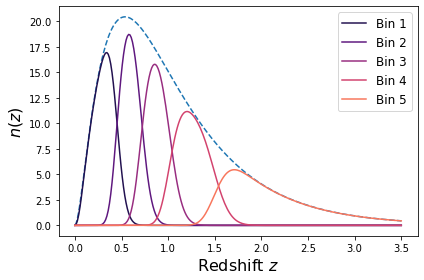

In [4]:
plot(z, nz(z)*nz.gals_per_arcmin2, '--')
for i,b in enumerate(nz_bins):
  plot(z, b(z)*b.gals_per_arcmin2, color=sn.color_palette("magma")[i],label="Bin %d"%(i+1))
xlabel('Redshift $z$',fontsize=16)
ylabel('$n(z)$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()

In [5]:
palette1=sn.color_palette("blend:#7AB,#EDA")
palette2=sn.color_palette("viridis")

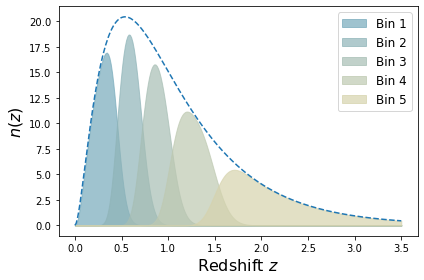

In [6]:
plot(z, nz(z)*nz.gals_per_arcmin2, '--')
for i,b in enumerate(nz_bins):
    fill_between(z, (b(z)*b.gals_per_arcmin2).min(), b(z)*b.gals_per_arcmin2, alpha=0.7, color=palette1[i],label="Bin %d"%(i+1))

xlabel('Redshift $z$',fontsize=16)
ylabel('$n(z)$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()
plt.savefig('../figures/redshift_distribution_light.pdf')

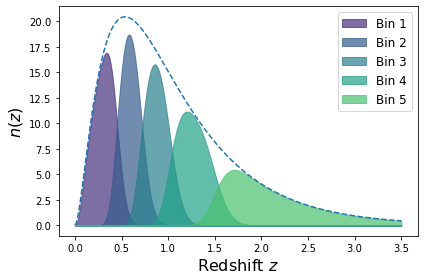

In [7]:
plot(z, nz(z)*nz.gals_per_arcmin2, '--')
for i,b in enumerate(nz_bins):
    fill_between(z, (b(z)*b.gals_per_arcmin2).min(), b(z)*b.gals_per_arcmin2, alpha=0.7, color=palette2[i],label="Bin %d"%(i+1))

xlabel('Redshift $z$',fontsize=16)
ylabel('$n(z)$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()
plt.savefig('../figures/redshift_distribution_dark.pdf')